# Imports

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# From our Data Directory
from pathlib import Path
data_dir = Path("data")
outputs_dir = Path("outputs")

# Uploading and Cleaning Data

In [2]:
student_data = pd.read_csv(data_dir/"student_data.csv", sep = ";" )

In [3]:
clean_sd = student_data[['Previous qualification (grade)','Debtor', 'Age at enrollment', 'Admission grade', 'Target', 'Tuition fees up to date']]

# Remove enrolled students
clean_sd = clean_sd[clean_sd["Target"] != "Enrolled"]

Previous qualification (grade) & Admission grade is from a scale of 0 - 200



Debtor = 1 means that yes they going into debt



Tuition fees up to date = 1 means that yes they are up to date

In [4]:
clean_sd

,Previous qualification (grade),Debtor,Age at enrollment,Admission grade,Target,Tuition fees up to date
0,122.0,0,20,127.3,Dropout,1
1,160.0,0,19,142.5,Graduate,0
2,122.0,0,19,124.8,Dropout,0
3,122.0,0,20,119.6,Graduate,1
4,100.0,0,45,141.5,Graduate,1
...,...,...,...,...,...,...
4419,125.0,0,19,122.2,Graduate,1
4420,120.0,1,18,119.0,Dropout,0
4421,154.0,0,30,149.5,Dropout,1
4422,180.0,0,20,153.8,Graduate,1


# Target

In [5]:
# Graduates versus Dropouts
total_grads = sum(clean_sd["Target"] == "Graduate")
total_drops = sum(clean_sd["Target"] == "Dropout")
print(total_grads)
print(total_drops)

2209
1421


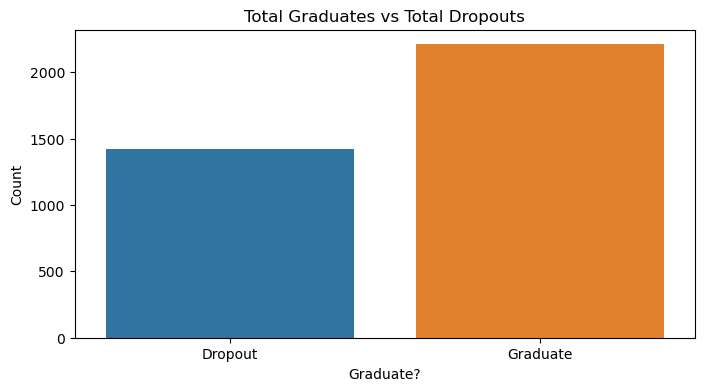

In [6]:
# Graduates versus Dropouts Plot
plt.figure(figsize=(8,4))
sns.countplot(clean_sd, x = "Target", hue = "Target", legend = False)
plt.title("Total Graduates vs Total Dropouts")
plt.xlabel("Graduate?")
plt.ylabel("Count")
plt.savefig(outputs_dir / "Total_Graduates_and_Dropouts.png", dpi=300, bbox_inches="tight")
plt.show()

# Previous Qualification and Admission Grade

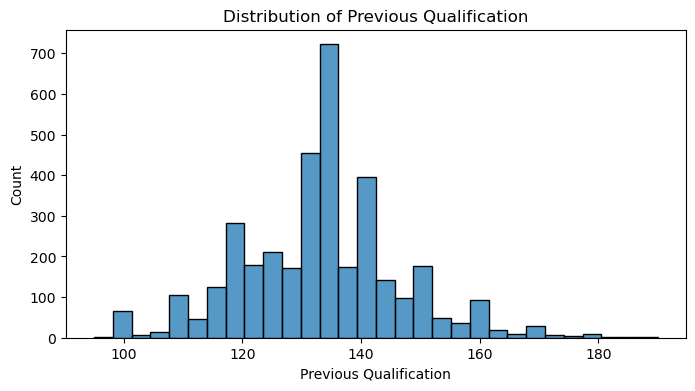

In [7]:
# Previous Qualification
plt.figure(figsize=(8,4))
sns.histplot(clean_sd["Previous qualification (grade)"], bins = 30)#, stat = "density")
plt.title("Distribution of Previous Qualification")
plt.xlabel("Previous Qualification")
plt.ylabel("Count")
plt.savefig(outputs_dir / "Distribution_of_Previous_Qualification.png", dpi=300, bbox_inches="tight")
plt.show()

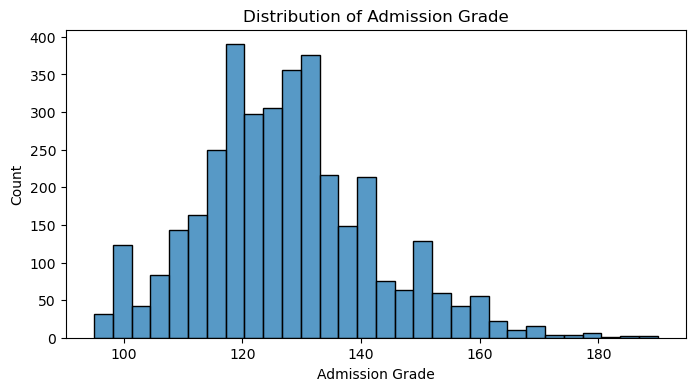

In [8]:
# Admission Grade
plt.figure(figsize=(8,4))
sns.histplot(clean_sd["Admission grade"], bins = 30)#, stat = "density")
plt.title("Distribution of Admission Grade")
plt.xlabel("Admission Grade")
plt.ylabel("Count")
plt.savefig(outputs_dir / "Distribution_of_Admission_Grade.png", dpi=300, bbox_inches="tight")
plt.show()

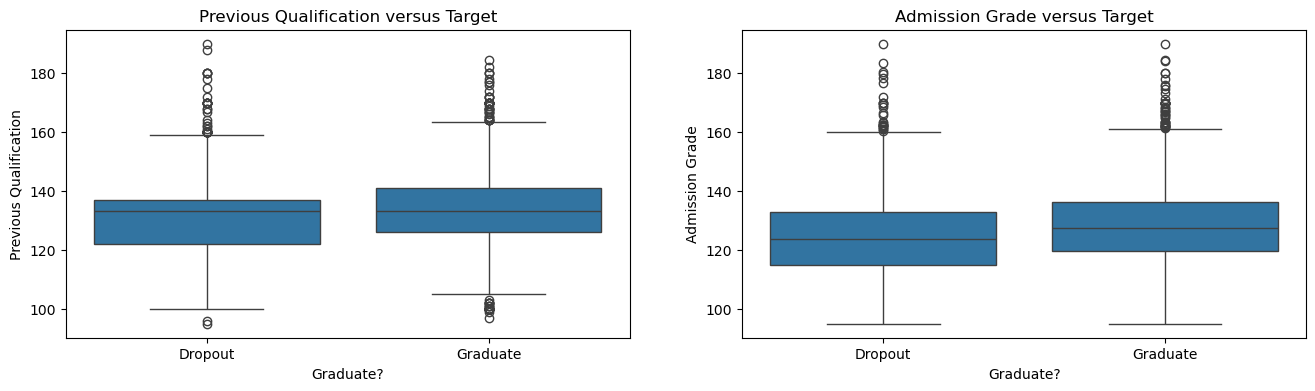

In [9]:
# Previous Qualification and Admission Grade
fig, plots = plt.subplots(1, 2, figsize = (16, 4))
sns.boxplot(clean_sd, x = "Target", y = "Previous qualification (grade)", ax = plots[0])
sns.boxplot(clean_sd, x = "Target", y = "Admission grade", ax = plots[1])
plots[0].set_title("Previous Qualification versus Target")
plots[1].set_title("Admission Grade versus Target")
plots[0].set_xlabel("Graduate?")
plots[1].set_xlabel("Graduate?")
plots[0].set_ylabel("Previous Qualification")
plots[1].set_ylabel("Admission Grade")
plt.savefig(outputs_dir / "Prev_Qual_Admission_Grade_Boxplots.png", dpi=300, bbox_inches="tight")
plt.show()

# Age at Enrollment

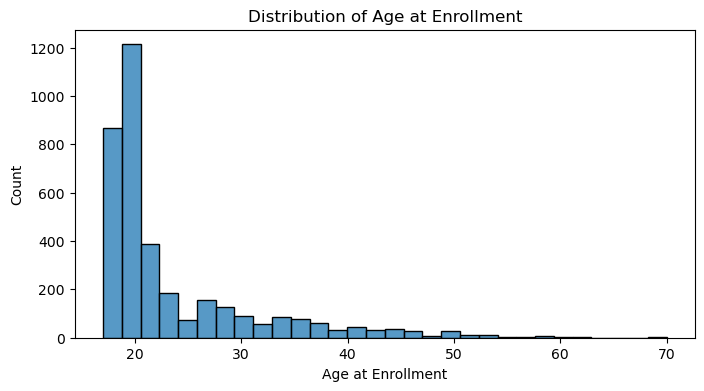

In [10]:
plt.figure(figsize=(8,4))
sns.histplot(clean_sd["Age at enrollment"], bins = 30)#, stat = "density")
plt.title("Distribution of Age at Enrollment")
plt.xlabel("Age at Enrollment")
plt.ylabel("Count")
plt.savefig(outputs_dir / "Distribution_of_Age_at_Enrollment.png", dpi=300, bbox_inches="tight")
plt.show()

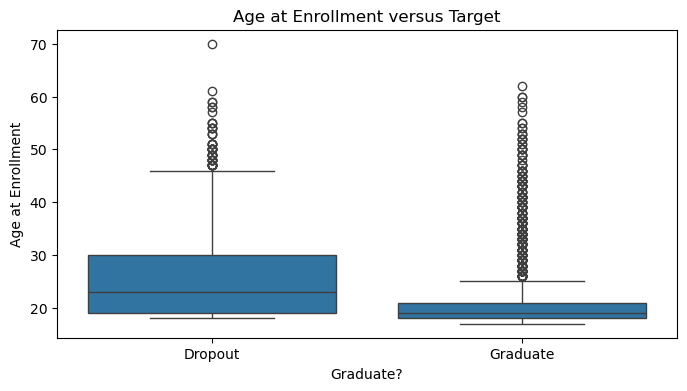

In [11]:
plt.figure(figsize=(8,4))
sns.boxplot(clean_sd, x = "Target", y = "Age at enrollment")
plt.title("Age at Enrollment versus Target")
plt.xlabel("Graduate?")
plt.ylabel("Age at Enrollment")
plt.savefig(outputs_dir / "Boxplot_of_Age_at_Enrollment.png", dpi=300, bbox_inches="tight")
plt.show()

# Debtor and Tuition Fees

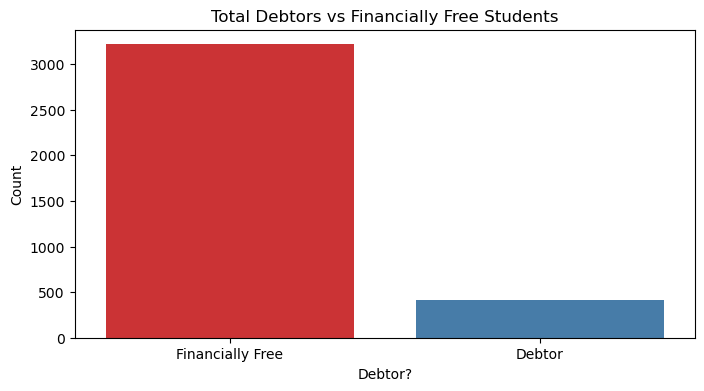

In [12]:
# Debtor versus Not Plot
plt.figure(figsize=(8,4))
sns.countplot(clean_sd, x = "Debtor", hue = "Debtor", palette="Set1", legend = False)
plt.title("Total Debtors vs Financially Free Students")
plt.xlabel("Debtor?")
plt.xticks([0, 1], ["Financially Free", "Debtor"])
plt.ylabel("Count")
plt.savefig(outputs_dir / "Debtor_Plot.png", dpi=300, bbox_inches="tight")
plt.show()

Large majority of financially free students is likely due to the student sampling process conducted: it's likely that many students were attending international universities rather than in the U.S. where many students take on student loan debt (specifically universities in Portugal).

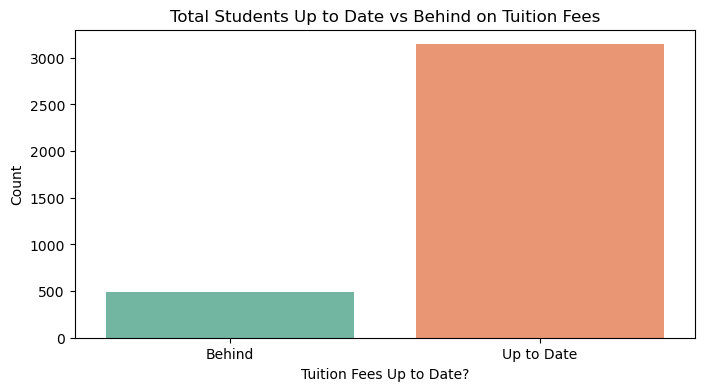

In [13]:
# Tuition fees up to date versus Not Plot
plt.figure(figsize=(8,4))
sns.countplot(clean_sd, x = "Tuition fees up to date", hue = "Tuition fees up to date", palette="Set2", legend = False)
plt.title("Total Students Up to Date vs Behind on Tuition Fees")
plt.xlabel("Tuition Fees Up to Date?")
plt.xticks([0, 1], ["Behind", "Up to Date"])
plt.ylabel("Count")
plt.savefig(outputs_dir / "Tuition_Fees_Plot.png", dpi=300, bbox_inches="tight")
plt.show()

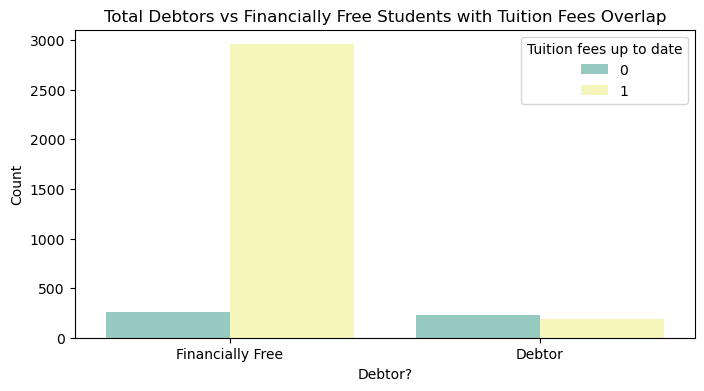

In [14]:
# Overlap of Debtors and Tuition Fees
plt.figure(figsize=(8,4))
sns.countplot(clean_sd, x = "Debtor", hue = "Tuition fees up to date", palette="Set3")
plt.title("Total Debtors vs Financially Free Students with Tuition Fees Overlap")
plt.xlabel("Debtor?")
plt.xticks([0, 1], ["Financially Free", "Debtor"])
plt.ylabel("Count")
plt.savefig(outputs_dir / "Debtor_Tuition_Fees_Plot.png", dpi=300, bbox_inches="tight")
plt.show()

Proportion of Financially Free Students that Graduated: 0.655268884053466
Proportion of Student Debtors that Graduated: 0.24455205811138014


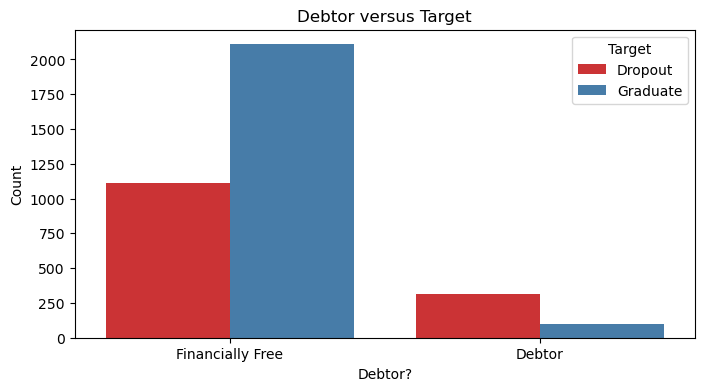

In [15]:
# Debtors versus Target
prop_free_grad = np.mean(clean_sd[clean_sd["Debtor"] == 0]["Target"] == "Graduate")
prop_debt_grad = np.mean(clean_sd[clean_sd["Debtor"] == 1]["Target"] == "Graduate")
print(f"Proportion of Financially Free Students that Graduated: {prop_free_grad}")
print(f"Proportion of Student Debtors that Graduated: {prop_debt_grad}")

plt.figure(figsize=(8,4))
sns.countplot(clean_sd, x = "Debtor", hue = "Target", palette="Set1")
plt.title("Debtor versus Target")
plt.xlabel("Debtor?")
plt.xticks([0, 1], ["Financially Free", "Debtor"])
plt.ylabel("Count")
plt.savefig(outputs_dir / "Debtor_versus_Target.png", dpi=300, bbox_inches="tight")
plt.show()

Proportion of Students Behind on Tuition Fees that Graduated: 0.693384223918575
Proportion of Students Up to Date on Tuition Fees that Graduated: 0.059670781893004114


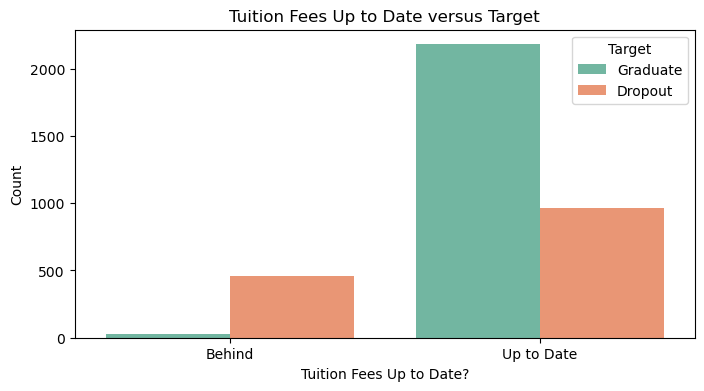

In [16]:
# Tuition Fees versus Target
prop_behind_grad = np.mean(clean_sd[clean_sd["Tuition fees up to date"] == 1]["Target"] == "Graduate")
prop_up_grad = np.mean(clean_sd[clean_sd["Tuition fees up to date"] == 0]["Target"] == "Graduate")
print(f"Proportion of Students Behind on Tuition Fees that Graduated: {prop_behind_grad}")
print(f"Proportion of Students Up to Date on Tuition Fees that Graduated: {prop_up_grad}")

plt.figure(figsize=(8,4))
sns.countplot(clean_sd, x = "Tuition fees up to date", hue = "Target", palette="Set2")
plt.title("Tuition Fees Up to Date versus Target")
plt.xlabel("Tuition Fees Up to Date?")
plt.xticks([0, 1], ["Behind", "Up to Date"])
plt.ylabel("Count")
plt.savefig(outputs_dir / "Tuition_Fees_versus_Target.png", dpi=300, bbox_inches="tight")
plt.show()